**Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Check for missing value "unknown"**

In [3]:
for i in df.columns:
    nr=df[df[i]=='unknown'].shape[0]
    if nr>0:
        print(i,':',nr)

C:\Users\iel\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


job : 288
education : 1857
contact : 13020
poutcome : 36959


**Eliminate Attributes with large missing values**

In [4]:
df2=pd.read_csv('bank-full.csv', sep=';')
df2=df2.loc[:,df2.columns!='Unnamed: 0']
df2=df2.loc[:,df2.columns!='poutcome']
df2=df2.loc[:,df2.columns!='contact']
df2.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,no


In [5]:
for i in df2.columns:
    nr=df2[df2[i]=='unknown'].shape[0]
    if nr>0:
        print(i,':',nr)

job : 288
education : 1857


**Check for Multicollinearity**

Text(0.5, 1, 'Multi-Collinearity of Customer Attributes')

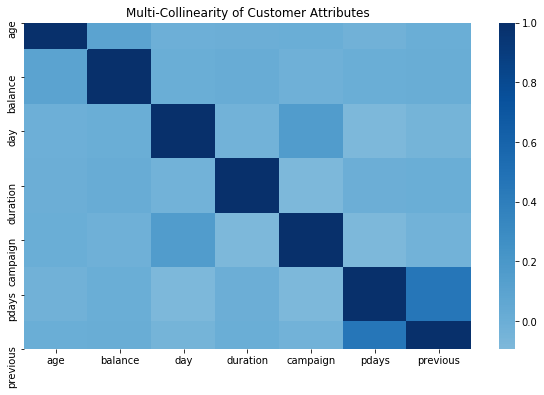

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df2.corr(), center=0, cmap='Blues')
ax.set_title('Multi-Collinearity of Customer Attributes')

**Check for Imbalance Training Data**

In [29]:
df2.groupby(['y']).size()

y
no     39922
yes     5289
dtype: int64

**Encode categorical data**

In [30]:
df_encode2 = df2
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in (df2.columns):
    if (df2[i].dtypes=='object'):
        df_encode2[i]=le.fit_transform(df2[i].astype(str))
        
df_encode2.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,4,1,2,0,2143,1,0,5,8,261,1,-1,0,0
1,44,9,2,1,0,29,1,0,5,8,151,1,-1,0,0
2,33,2,1,1,0,2,1,1,5,8,76,1,-1,0,0
3,47,1,1,3,0,1506,1,0,5,8,92,1,-1,0,0
4,33,11,2,3,0,1,0,0,5,8,198,1,-1,0,0


**Import packages for model testing**

In [48]:
# import the necessary packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [32]:
# define the dictionary of models our script can use
# the key to the dictionary is the name of the model
# (supplied via command line argument) and the value is the model itself
models = {
"knn": KNeighborsClassifier(n_neighbors=1),
"naive_bayes": GaussianNB(),
"logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
"decision_tree": DecisionTreeClassifier(),
"random_forest": RandomForestClassifier(n_estimators=100),
}

**Import package for SMOTE oversampling**

In [33]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

**Feature Engineering**

In [34]:
dataset_features2=df_encode2.loc[:,df_encode2.columns!='y'].values
target2=df_encode2.loc[:,df_encode2.columns=='y']
dataset_features2

array([[ 58,   4,   1, ...,   1,  -1,   0],
       [ 44,   9,   2, ...,   1,  -1,   0],
       [ 33,   2,   1, ...,   1,  -1,   0],
       ...,
       [ 72,   5,   1, ...,   5, 184,   3],
       [ 57,   1,   1, ...,   4,  -1,   0],
       [ 37,   2,   1, ...,   2, 188,  11]], dtype=int64)

**Standardizing values**

In [35]:
df_encode2_std=(df_encode2['balance']-np.nanmean(df_encode2['balance']))/np.std(df_encode2['balance'])
df_encode2_2=df_encode2
df_encode2_2['balance']=df_encode2_std
df_encode2_2.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,4,1,2,0,0.256419,1,0,5,8,261,1,-1,0,0
1,44,9,2,1,0,-0.437895,1,0,5,8,151,1,-1,0,0
2,33,2,1,1,0,-0.446762,1,1,5,8,76,1,-1,0,0
3,47,1,1,3,0,0.047205,1,0,5,8,92,1,-1,0,0
4,33,11,2,3,0,-0.447091,0,0,5,8,198,1,-1,0,0


In [36]:
df_encode2_std=(df_encode2['duration']-np.nanmean(df_encode2['duration']))/np.std(df_encode2['duration'])
df_encode2_2['duration']=df_encode2_std
df_encode2_2.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,4,1,2,0,0.256419,1,0,5,8,0.011016,1,-1,0,0
1,44,9,2,1,0,-0.437895,1,0,5,8,-0.416127,1,-1,0,0
2,33,2,1,1,0,-0.446762,1,1,5,8,-0.707361,1,-1,0,0
3,47,1,1,3,0,0.047205,1,0,5,8,-0.645231,1,-1,0,0
4,33,11,2,3,0,-0.447091,0,0,5,8,-0.233620,1,-1,0,0


In [37]:
dataset_features2_2=df_encode2_2.loc[:,df_encode2_2.columns!='y'].values
target2_2=df_encode2_2.loc[:,df_encode2_2.columns=='y']
dataset_features2_2

array([[ 58.,   4.,   1., ...,   1.,  -1.,   0.],
       [ 44.,   9.,   2., ...,   1.,  -1.,   0.],
       [ 33.,   2.,   1., ...,   1.,  -1.,   0.],
       ...,
       [ 72.,   5.,   1., ...,   5., 184.,   3.],
       [ 57.,   1.,   1., ...,   4.,  -1.,   0.],
       [ 37.,   2.,   1., ...,   2., 188.,  11.]])

**Data oversampling**

In [38]:
X_resampled2_2, y_resampled2_2 = SMOTE().fit_resample(dataset_features2_2, target2_2)
print(sorted(Counter(y_resampled2_2).items()))

C:\Users\iel\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[(0, 39922), (1, 39922)]


**Split training and test data**

In [39]:
# Perform a training and testing split
# using 80% of the data for training and 20% for evaluation
(trainX2_2, testX2_2, trainY2_2, testY2_2) = train_test_split(X_resampled2_2,y_resampled2_2, random_state=3, test_size=0.2)

**Test Models**

In [50]:
model = models['decision_tree']

model.fit(trainX2_2, trainY2_2)
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX2_2)
print(classification_report(testY2_2, predictions))

print('cross validation')
scores = cross_val_score(model, trainX2_2, trainY2_2, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7990
           1       0.90      0.91      0.91      7979

    accuracy                           0.91     15969
   macro avg       0.91      0.91      0.91     15969
weighted avg       0.91      0.91      0.91     15969

cross validation
Accuracy: 0.91 (+/- 0.01)


In [51]:
model = models['knn']

model.fit(trainX2_2, trainY2_2)
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX2_2)
print(classification_report(testY2_2, predictions))

print('cross validation')
scores = cross_val_score(model, trainX2_2, trainY2_2, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      7990
           1       0.89      0.99      0.94      7979

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969

cross validation
Accuracy: 0.93 (+/- 0.01)


In [52]:
model = models['logit']

model.fit(trainX2_2, trainY2_2)
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX2_2)
print(classification_report(testY2_2, predictions))

print('cross validation')
scores = cross_val_score(model, trainX2_2, trainY2_2, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\Users\iel\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      7990
           1       0.81      0.80      0.80      7979

    accuracy                           0.80     15969
   macro avg       0.80      0.80      0.80     15969
weighted avg       0.80      0.80      0.80     15969

cross validation


C:\Users\iel\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\iel\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\iel\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\iel\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\iel\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear

Accuracy: 0.81 (+/- 0.01)


C:\Users\iel\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [53]:
model = models['random_forest']

model.fit(trainX2_2, trainY2_2)
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX2_2)
print(classification_report(testY2_2, predictions))

print('cross validation')
scores = cross_val_score(model, trainX2_2, trainY2_2, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7990
           1       0.94      0.95      0.95      7979

    accuracy                           0.95     15969
   macro avg       0.95      0.95      0.95     15969
weighted avg       0.95      0.95      0.95     15969

cross validation
Accuracy: 0.94 (+/- 0.01)


In [54]:
model = models['naive_bayes']

model.fit(trainX2_2, trainY2_2)
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX2_2)
print(classification_report(testY2_2, predictions))

print('cross validation')
scores = cross_val_score(model, trainX2_2, trainY2_2, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.83      0.63      0.71      7990
           1       0.70      0.87      0.78      7979

    accuracy                           0.75     15969
   macro avg       0.77      0.75      0.75     15969
weighted avg       0.77      0.75      0.75     15969

cross validation
Accuracy: 0.75 (+/- 0.01)
